In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [5]:
import regex as re

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]+", '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

df_train["cleaned_text"] = df_train["text"].apply(preprocess_text)
df_test["cleaned_text"] = df_test["text"].apply(preprocess_text)

In [6]:
df_test["cleaned_text"]

0                      Just happened a terrible car crash
1       Heard about earthquake is different cities sta...
2       there is a forest fire at spot pond geese are ...
3                   Apocalypse lighting Spokane wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES SAFETY FASTENERS...
3259    Storm in RI worse than last hurricane My citya...
3260                     Green Line derailment in Chicago
3261             MEG issues Hazardous Weather Outlook HWO
3262    CityofCalgary has activated its Municipal Emer...
Name: cleaned_text, Length: 3263, dtype: object

In [7]:
#from transformers import AdamW, RobertaTokenizer, RobertaForSequenceClassification
from transformers import AdamW, DistilBertTokenizer, DistilBertForSequenceClassification
#from transformers import AdamW, BertTokenizer, BertForSequenceClassification





from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tqdm import tqdm

import torch

# Dataset preparation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_train["cleaned_text"], df_train["target"], test_size=0.2, random_state=42
)

#tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
#model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

#tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
#model = BertForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)




device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model.to(device)
print(f"Using device: {device}")


train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


In [8]:
import torch

class DisasterDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.encodings['input_ids'])  


    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:  # Add labels only if they exist
            item['labels'] = torch.tensor(self.labels[idx])
        return item

In [9]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Dataset and DataLoaders
train_dataset = DisasterDataset(train_encodings, train_labels.tolist())
val_dataset = DisasterDataset(val_encodings, val_labels.tolist())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Optimizer
optimizer = AdamW(
    model.parameters(),
    lr=1e-5,
    betas=(0.9, 0.999),
    eps=1e-8,
    weight_decay=0.01,
    correct_bias=True
)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Training loop
model.train()
for epoch in range(10):  # Number of epochs
    loop = tqdm(train_loader, leave=True)
    epoch_loss = 0

    for batch in loop:
        # Move to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        epoch_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update progress bar
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 9: 100%|██████████| 381/381 [00:38<00:00,  9.86it/s, loss=0.0924]


In [10]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Evaluation loop
model.eval()
val_loss = 0  # Initialize validation loss
all_preds = []
all_labels = []
for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        
        # Compute loss if labels are available
        if outputs.loss is not None:
            val_loss += outputs.loss.item()
        
        # Get predictions
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Average validation loss
val_loss /= len(val_loader)

# Print results
print(f"Validation Loss: {val_loss}")
f1 = f1_score(all_labels, all_preds)
print(f"F1 Score: {f1}")


# Classification Report and Confusion Matrix
print(classification_report(all_labels, all_preds))

Validation Loss: 0.795080765337237
F1 Score: 0.7688442211055276
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       874
           1       0.84      0.71      0.77       649

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.82      1523



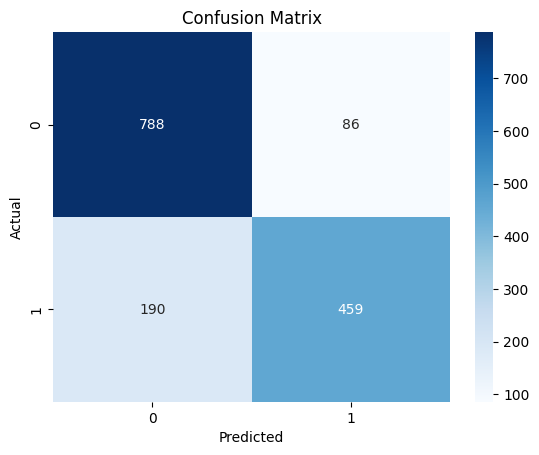

In [11]:
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

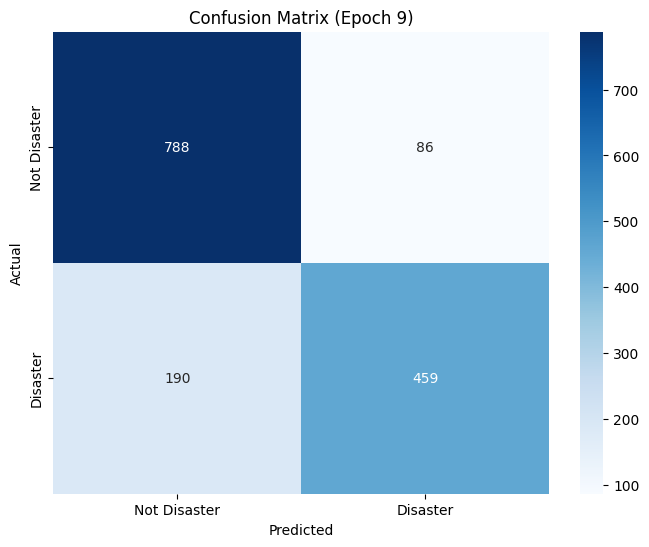

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Disaster', 'Disaster'], yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Epoch {epoch})')
plt.show()

# Step scheduler
scheduler.step(val_loss)

In [13]:
test_sentences = list(df_test['text'].values)
#test_encodings = tokenizer(test_sentences, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(df_test['text']), truncation=True, padding=True, max_length=128)

#test_inputs = torch.tensor(test_encodings['input_ids'])
#test_masks = torch.tensor(test_encodings['attention_mask'])

#test_data = DisasterDataset(test_inputs, test_masks, torch.zeros(len(test_inputs)))  # No labels in test set
#test_loader = DataLoader(test_data, batch_size=16)

test_data = DisasterDataset(test_encodings)
test_loader = DataLoader(test_data, batch_size=16)

model.eval()
predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())

submission = pd.DataFrame({'id': df_test['id'], 'target': predictions})
submission.to_csv('submission.csv', index=False)